In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')

print(df.describe())
print('\n')
print(df.isnull().sum())

df['date'] = pd.to_datetime(df['date'])

                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02


id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


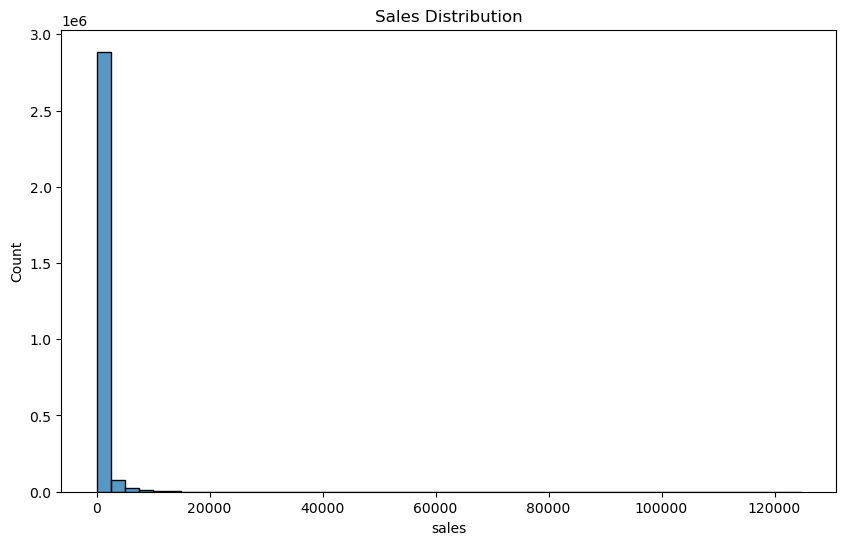

In [7]:
# Exploratory Data Analysis (EDA)
# Sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sales'], bins=50)
plt.title('Sales Distribution')
plt.show()

# Group data by store and family, aggregate sales
grouped = df.groupby(['store_nbr', 'family', 'date']).agg({'sales': 'sum'}).reset_index()

# Feature engineering: add time-based features
grouped['month'] = grouped['date'].dt.month
grouped['day'] = grouped['date'].dt.day
grouped['dayofweek'] = grouped['date'].dt.dayofweek

# Lag feature (previous day's sales) to capture temporal trends
grouped['sales_lag_1'] = grouped.groupby(['store_nbr', 'family'])['sales'].shift(1)

# Drop rows with missing lag feature values
grouped = grouped.dropna()

# Encode the 'family' column (categorical) using one-hot encoding
grouped = pd.get_dummies(grouped, columns=['family'])

# Drop date column since it's not needed after feature engineering
grouped = grouped.drop('date', axis=1)


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X = grouped.drop('sales', axis=1)
y = grouped['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales', alpha=0.7)
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

NameError: name 'grouped' is not defined

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


NameError: name 'X' is not defined